In [1]:
import json
from datetime import datetime
from pathlib import Path

import numpy as np

from trial import Trial, load_trials
from utils import SetUpstreamSteererAtStep


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
trial_index = 33

trials = load_trials(Path("trials.yaml"))

comment = f"trial_{trial_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = trials[trial_index].target_beam[0]
target_sigma_x = trials[trial_index].target_beam[1]
target_mu_y = trials[trial_index].target_beam[2]
target_sigma_y = trials[trial_index].target_beam[3]
target_mu_x_threshold = 3.3198e-9
target_mu_y_threshold = 3.3198e-9
target_sigma_x_threshold = 3.3198e-9
target_sigma_y_threshold = 3.3198e-9


In [4]:
from backend import EADOOCSBackend
from environment import EATransverseTuning

env = EATransverseTuning(
    backend=EADOOCSBackend(), magnet_init_mode="constant", magnet_init_values=np.zeros(5)
)
env.reset()


math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : beam.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : : : : : : : high_order.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


{'beam': array([7.0975998e-06, 1.3321185e-03, 5.8006961e-04, 9.8525616e-04],
       dtype=float32),
 'magnets': array([0., 0., 0., 0., 0.], dtype=float32),
 'target': array([0.00086053, 0.00074457, 0.00190991, 0.00106676], dtype=float32)}

11it [01:10,  6.42s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2023-02-01 22:27:16.909574\nTime taken: 0:01:10.659647\nNo. of steps: 11\n\nBeam before:\n    mu_x    =  0.0142 mm\n    sigma_x =  1.3743 mm\n    mu_y    =  0.5551 mm\n    sigma_y =  0.9810 mm\n\nBeam after:\n    mu_x    = -0.1490 mm\n    sigma_x =  0.2954 mm\n    mu_y    =  0.0050 mm\n    sigma_y =  2.1616 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.9494 mm\n    |delta_sigma_x| =  0.0675 mm\n    |delta_mu_y|    =  1.9183 mm\n    |delta_sigma_y| =  1.9649 mm\n\n    MAE =  1.2250 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.1217 1/m^2\n    AREAMQZM2 strength =  -1.7447 1/m^2\n    AREAMCVM1 kick     =  -0.

/usr/bin/lp: No such file or directory


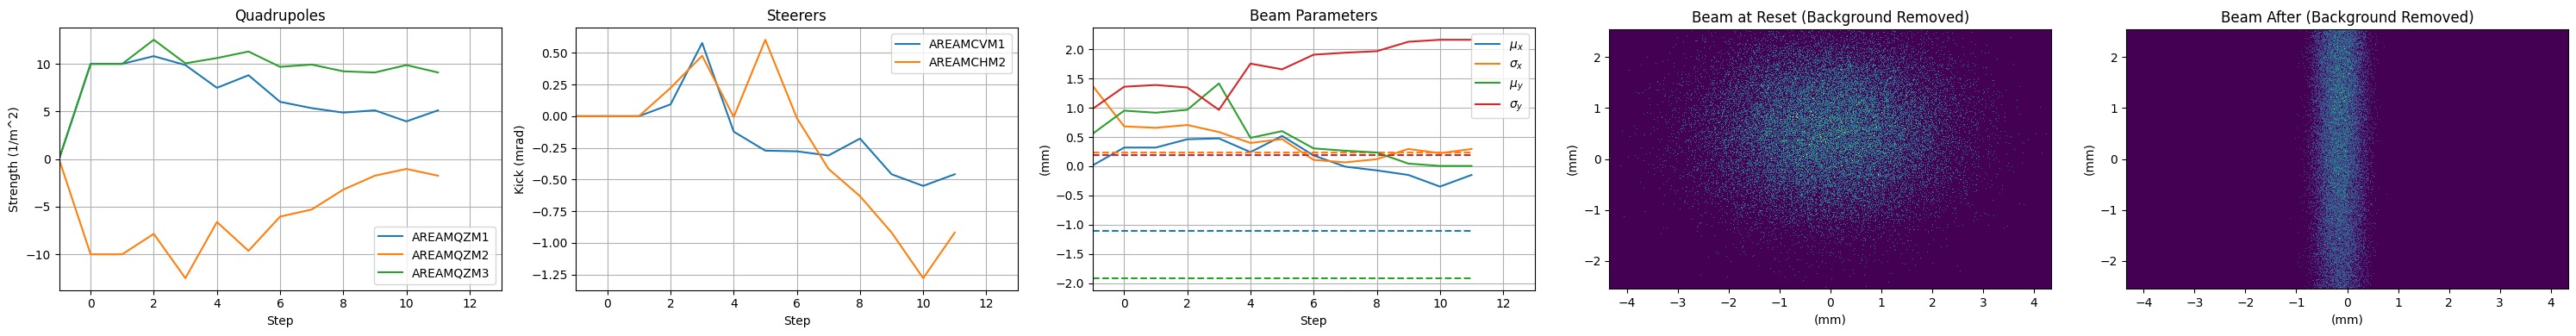

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="Bayesian Optimisation",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [6]:
from backend import EADOOCSBackend
from environment import EATransverseTuning

env = EATransverseTuning(
    backend=EADOOCSBackend(), magnet_init_mode="constant", magnet_init_values=np.zeros(5)
)
env.reset()


{'beam': array([-3.5487999e-05,  1.3200631e-03,  5.6506781e-04,  9.6402224e-04],
       dtype=float32),
 'magnets': array([0., 0., 0., 0., 0.], dtype=float32),
 'target': array([0.00110151, 0.00137572, 0.00093855, 0.00166141], dtype=float32)}

100%|██████████| 10/10 [01:02<00:00,  6.27s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-02-01 22:28:47.751384\nTime taken: 0:01:02.719179\nNo. of steps: 10\n\nBeam before:\n    mu_x    = -0.0426 mm\n    sigma_x =  1.3381 mm\n    mu_y    =  0.5751 mm\n    sigma_y =  0.9895 mm\n\nBeam after:\n    mu_x    = -1.0788 mm\n    sigma_x =  0.1929 mm\n    mu_y    = -1.9452 mm\n    sigma_y =  0.3270 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0196 mm\n    |delta_sigma_x| =  0.0350 mm\n    |delta_mu_y|    =  0.0319 mm\n    |delta_sigma_y| =  0.1303 mm\n\n    MAE =  0.0542 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   4.5703 1/m^2\n    AREAMQZM2 strength = -14.7145 1/m^2\n    AREAMCVM1 kick     

/usr/bin/lp: No such file or directory


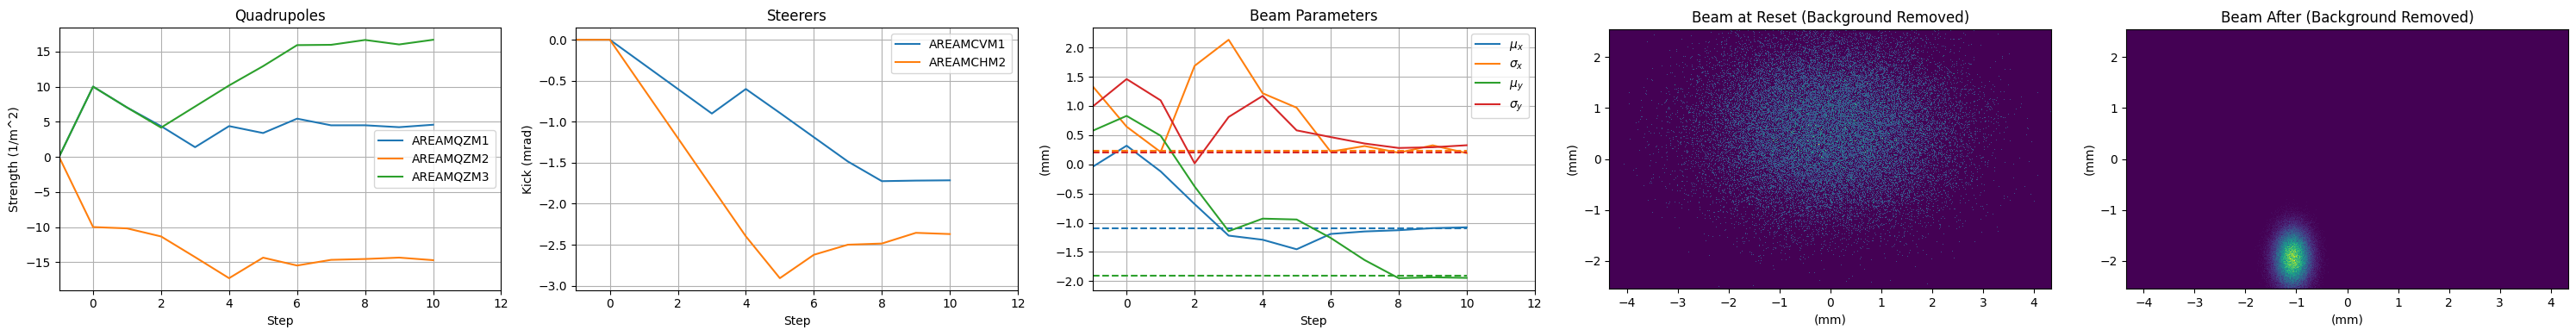

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="polished-donkey-996",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [8]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [9]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [10]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [11]:
# Reinforcement Learning with BO takeover
# from ea_rlbo import optimize_donkey_bo_combo

# bo_takeover = 0.00015

# optimize_donkey_bo_combo(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=50,
#     model_name="polished-donkey-996",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     rl_steps=10,
#     bo_takeover=bo_takeover,
#     beta=0.01,
#     stepsize=0.05,
# )
